In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [98]:
df = pd.read_csv("http://mcobaya.web.fc2.com/kadai1.csv")

In [111]:
df

,y0,x0,z0,y1,x1,z1,y2,x2,z2,y3,...,z6,y7,x7,z7,y8,x8,z8,y9,x9,z9
0,23.878073,2.629601,0.187512,18.282394,1.591020,0.141478,34.775392,5.327378,0.471912,18.250801,...,0.808600,24.884800,2.945533,0.199016,51.526317,8.767445,0.790014,18.841638,1.841706,0.118333
1,27.055982,3.341158,0.277958,27.099850,3.371585,0.246995,38.831747,5.908624,0.511811,31.069673,...,0.992709,31.305395,4.524653,0.357991,52.366037,8.672280,0.817574,48.789682,7.728911,0.684613
2,16.995618,1.406895,0.059037,18.069059,1.700630,0.074585,50.147891,8.164314,0.790934,32.963962,...,0.502346,56.403003,9.351051,0.918543,62.373762,10.670983,0.991362,31.463177,4.191085,0.400825
3,15.308782,1.137691,0.102648,15.331486,0.728766,0.058099,58.152204,9.516204,0.884695,27.665895,...,0.231867,61.632815,10.329119,0.973517,48.709511,7.895583,0.742164,43.635115,6.694046,0.654782
4,54.028241,8.768925,0.823602,31.971523,4.529516,0.380601,59.137664,9.525756,0.901609,24.307983,...,0.184862,20.194235,1.962346,0.156597,33.949686,4.947394,0.424000,10.678916,0.335091,0.002098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.586610,0.423602,0.023718,30.602177,3.944187,0.352399,32.362930,4.201561,0.335447,50.113068,...,0.579300,16.353772,1.292587,0.119218,16.651003,1.258303,0.036900,15.004579,0.794497,0.038710
96,25.722136,3.181620,0.260440,51.758369,8.340757,0.802883,39.126656,5.685350,0.472059,55.327735,...,0.736213,52.891059,8.651223,0.766459,30.852662,4.123941,0.382395,52.461830,8.244582,0.822805
97,32.114608,4.308879,0.395236,17.241189,1.613492,0.091887,30.435415,4.017161,0.364281,56.673122,...,0.131883,19.469658,1.741559,0.122732,25.287052,3.043932,0.244033,45.504184,7.196391,0.685297
98,42.797873,6.374535,0.573930,31.696538,4.484760,0.391703,14.153090,0.619423,0.025163,29.201937,...,0.077639,34.680474,4.972294,0.440179,35.621619,4.918773,0.477660,47.581812,7.500323,0.658000


In [100]:
df_train = df.loc[:, ['x1', 'z1']]
X_stat = sm.add_constant(df_train)
Y_stat = df[['y1']]

In [101]:
# 最小二乗法でモデル化
model_stat = sm.OLS(Y_stat, X_stat)
result_stat = model_stat.fit()

# 重回帰分析の結果を表示する
result_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     9050.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):          5.60e-111
Time:                        11:09:31   Log-Likelihood:                -140.47
No. Observations:                 100   AIC:                             286.9
Df Residuals:                      97   BIC:                             294.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7294      0.245     43.864      0.000      10.244      11.215
x1             4.5687      0.350     13.065      0.000       3.875       5.263
z1             3.4518      3.560      0.970      0.335      -3.613      10.517
==============================================================================
Omnibus:                        0.046   Durbin-Watson:                   2.350
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.080
Skew:                          -0.046   Prob(JB):                        0.961
Kurtosis:                       2.896   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

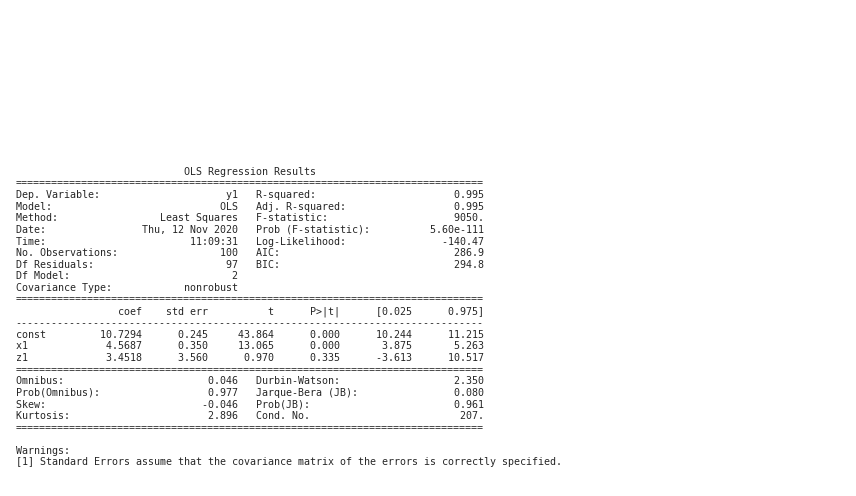

In [102]:
import matplotlib.pyplot as plt 
plt.rc('figure', figsize=(12, 7)) 
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach 
plt.text(0.01, 0.05, str(result_stat.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace! 
plt.axis('off') 
plt.tight_layout() 
plt.savefig('summary_Y_xz.jpg')

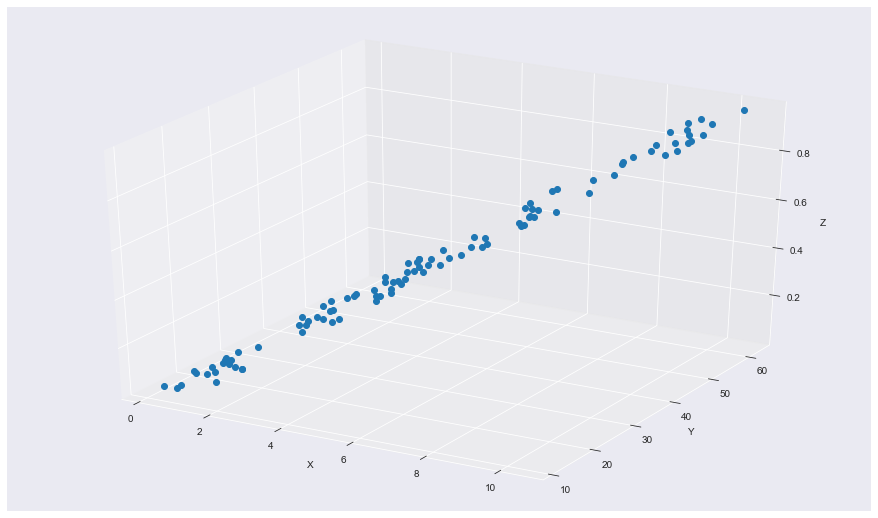

In [103]:
X = df['x1']
Y = df['y1']
Z = df['z1']

#seabornでグラフをきれいにしたいだけのコード
import seaborn as sns
sns.set_style("darkgrid")

#3次元プロットするためのモジュール
from mpl_toolkits.mplot3d import Axes3D

#グラフの枠を作っていく
fig = plt.figure()
ax = Axes3D(fig)

#軸にラベルを付けたいときは書く
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

#.plotで描画
#linestyle='None'にしないと初期値では線が引かれるが、3次元の散布図だと大抵ジャマになる
#markerは無難に丸
ax.plot(X,Y,Z,marker="o",linestyle='None')

#最後に.show()を書いてグラフ表示
plt.show()
fig.savefig("3d_Y_xz.png")

In [104]:
X_stat = sm.add_constant(df['z1'])
Y_stat = df[['y1']]

In [105]:
# 最小二乗法でモデル化
model_stat = sm.OLS(Y_stat, X_stat)
result_stat = model_stat.fit()

# 重回帰分析の結果を表示する
result_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6564.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.33e-91
Time:                        11:09:32   Log-Likelihood:                -191.23
No. Observations:                 100   AIC:                             386.5
Df Residuals:                      98   BIC:                             391.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6451      0.324     39.079      0.000      12.003      13.287
z1            49.7066      0.614     81.017      0.000      48.489      50.924
==============================================================================
Omnibus:                        0.203   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.347
Skew:                           0.089   Prob(JB):                        0.841
Kurtosis:                       2.772   Cond. No.                         4.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

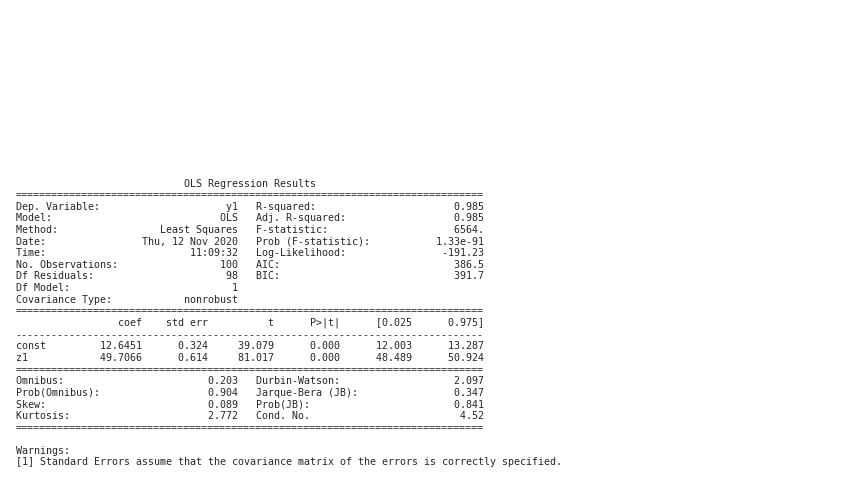

In [106]:
import matplotlib.pyplot as plt 
plt.rc('figure', figsize=(12, 7)) 
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach 
plt.text(0.01, 0.05, str(result_stat.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace! 
plt.axis('off') 
plt.tight_layout() 
plt.savefig('Y_z.jpg')

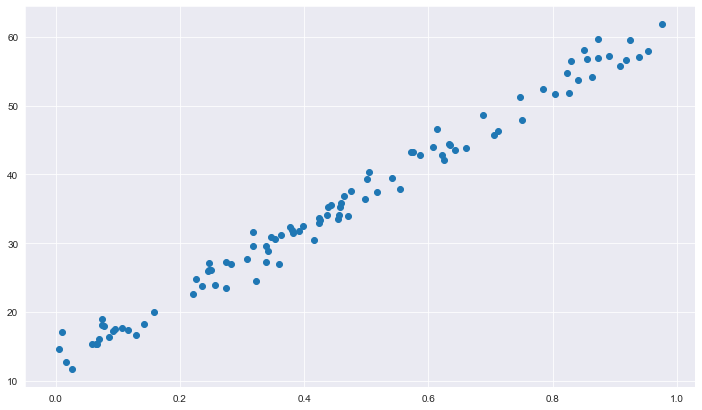

In [107]:
plt.scatter(df['z1'], df['y1'])
plt.savefig('scatter_Y_z')

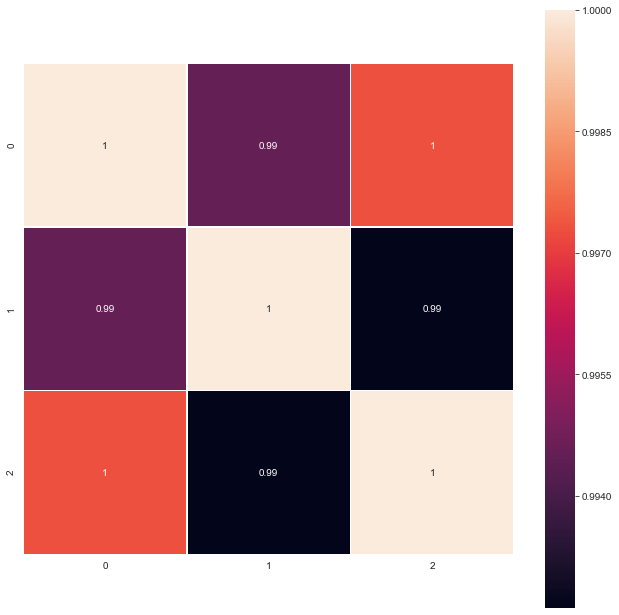

In [110]:
fig, ax = plt.subplots(figsize=(11, 11))
group = ['x1', 'z1', 'y1']
# We want to show all ticks...
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))
# ... and label them with the respective list entries
ax.set_xticklabels(group)
ax.set_yticklabels(group)
sns.heatmap(data, annot=True, linewidths=.5, ax=ax, square=True)
ax.set_ylim(len(data), 0)
fig.savefig("heatmap_Y_xz.jpg")